# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

0    1   2    3    4   5   6    7   8   9    10   11   12   13  14  15  \
0   822   95  41   82  170  65   9  145  46  19  145  163  314  140  64   4   
1   486  104  57  103  222  72  12  221  30  25  177  223  718  218  72  11   
2   182   91  42   66  169  66   7  145  44  19  140  169  325  159  67   4   
3   375  109  52   95  189  58   4  227  29  25  158  262  776  217  82   0   
4   528   95  47   73  195  70   7  167  38  20  152  184  430  185  69   9   
5   223   81  44   72  139  60   6  153  44  19  146  180  347  178  81   1   
6   840   93  34   66  140  56   7  130  51  18  120  151  251  114  62   5   
7   593   89  43   77  147  54   8  144  46  19  146  163  308  174  64  13   
8   346  117  52  110  228  65  12  212  31  24  163  228  668  220  66  21   
9   357  109  49  109  193  59  10  207  32  24  156  225  635  213  70  13   
10  482   94  46   79  181  62   8  167  40  20  148  190  418  193  67  12   
11  522   89  36   69  162  63   6  140  48  18  131  164  291  126  66   1   
12  176   84  39   90  180  60   7  177  37  21  131  209  469  145  71   4   
13  680   95  46   76  162  66  11  162  42  20  155  175  381  172  74   8   
14  393   86  47   75  165  68   6  154  43  19  146  176  356  190  74   7   

    16   17   18  
0    8  199  207  
1   12  186  195  
2    0  201  207  
3   19  187  186  
4   19  200  206  
5   15  182  186  
6   29  201  207  
7    5  194  201  
8   25  194  205  
9   31  191  202  
10  15  191  198  
11  38  193  204  
12  38  190  198  
13   4  184  193  
14   3  188  194

Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

0           1           2           3           4           5   \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean   425.723133   93.520947   44.675774   81.801457  168.204007   61.644809   
std    242.288797    8.063277    6.154680   15.928751   33.047995    7.110666   
min      0.000000   76.000000   33.000000   42.000000  104.000000   47.000000   
25%    217.000000   87.000000   40.000000   70.000000  140.000000   57.000000   
50%    430.000000   93.000000   44.000000   79.000000  165.000000   61.000000   
75%    636.000000   99.000000   49.000000   98.000000  195.000000   66.000000   
max    845.000000  117.000000   59.000000  110.000000  306.000000  126.000000   

               6           7           8           9           10          11  \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean     8.457195  167.327869   41.273224   20.468124  147.438980  186.734062   
std      3.945857   32.506680    7.777590    2.526030   14.631309   30.436279   
min      2.000000  114.000000   26.000000   17.000000  118.000000  131.000000   
25%      7.000000  146.000000   34.000000   19.000000  136.000000  167.000000   
50%      8.000000  157.000000   43.000000   20.000000  145.000000  177.000000   
75%     10.000000  196.000000   46.000000   23.000000  159.000000  216.000000   
max     52.000000  265.000000   59.000000   29.000000  186.000000  288.000000   

                12          13          14          15          16  \
count   549.000000  549.000000  549.000000  549.000000  549.000000   
mean    431.540984  173.763206   72.158470    6.522769   12.646630   
std     171.479332   31.793047    7.335198    4.980796    8.833356   
min     191.000000  112.000000   59.000000    0.000000    0.000000   
25%     317.000000  148.000000   67.000000    2.000000    6.000000   
50%     363.000000  173.000000   71.000000    6.000000   11.000000   
75%     576.000000  196.000000   75.000000   10.000000   19.000000   
max    1018.000000  268.000000  127.000000   22.000000   40.000000   

               17          18  
count  549.000000  549.000000  
mean   188.998179  195.854281  
std      6.298389    7.449629  
min    176.000000  181.000000  
25%    184.000000  191.000000  
50%    189.000000  197.000000  
75%    193.000000  201.000000  
max    206.000000  211.000000

In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.8 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{'bus': 132, 'opel': 152, 'saab': 133, 'van': 132}

Выборки сбалансированы, с этим ничего делать не нужно. Посмотрим на распределение признаков.

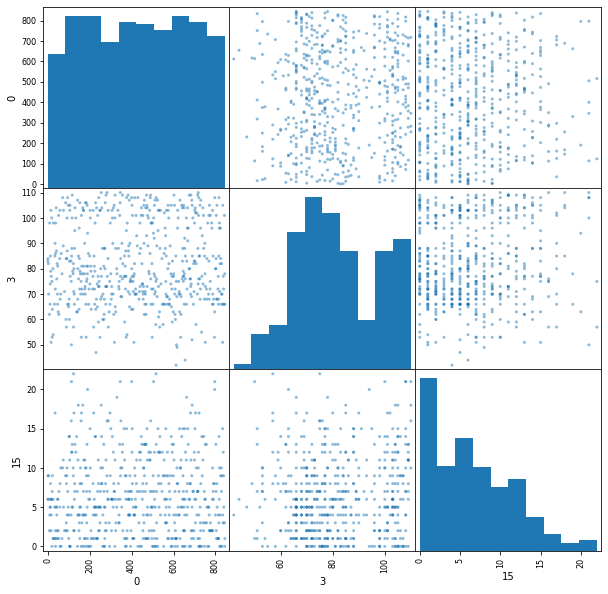

In [ ]:
from pandas.plotting import scatter_matrix

list_cols = [0, 3, 15]
scatter_matrix(X_train_pd[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Хочется масштабировать данные, так как различия в изменениях некоторых признаков порядка 10.

In [ ]:
from sklearn.preprocessing import StandardScaler
encoder = StandardScaler()
encoder.fit(X_train)


X_train_scaled = encoder.transform(X_train)
X_test_scaled = encoder.transform(X_test)


Посмотрим на попарные зависимости, вруг есть какие-то очевидные закономерности.

<Figure size 1080x2160 with 0 Axes>

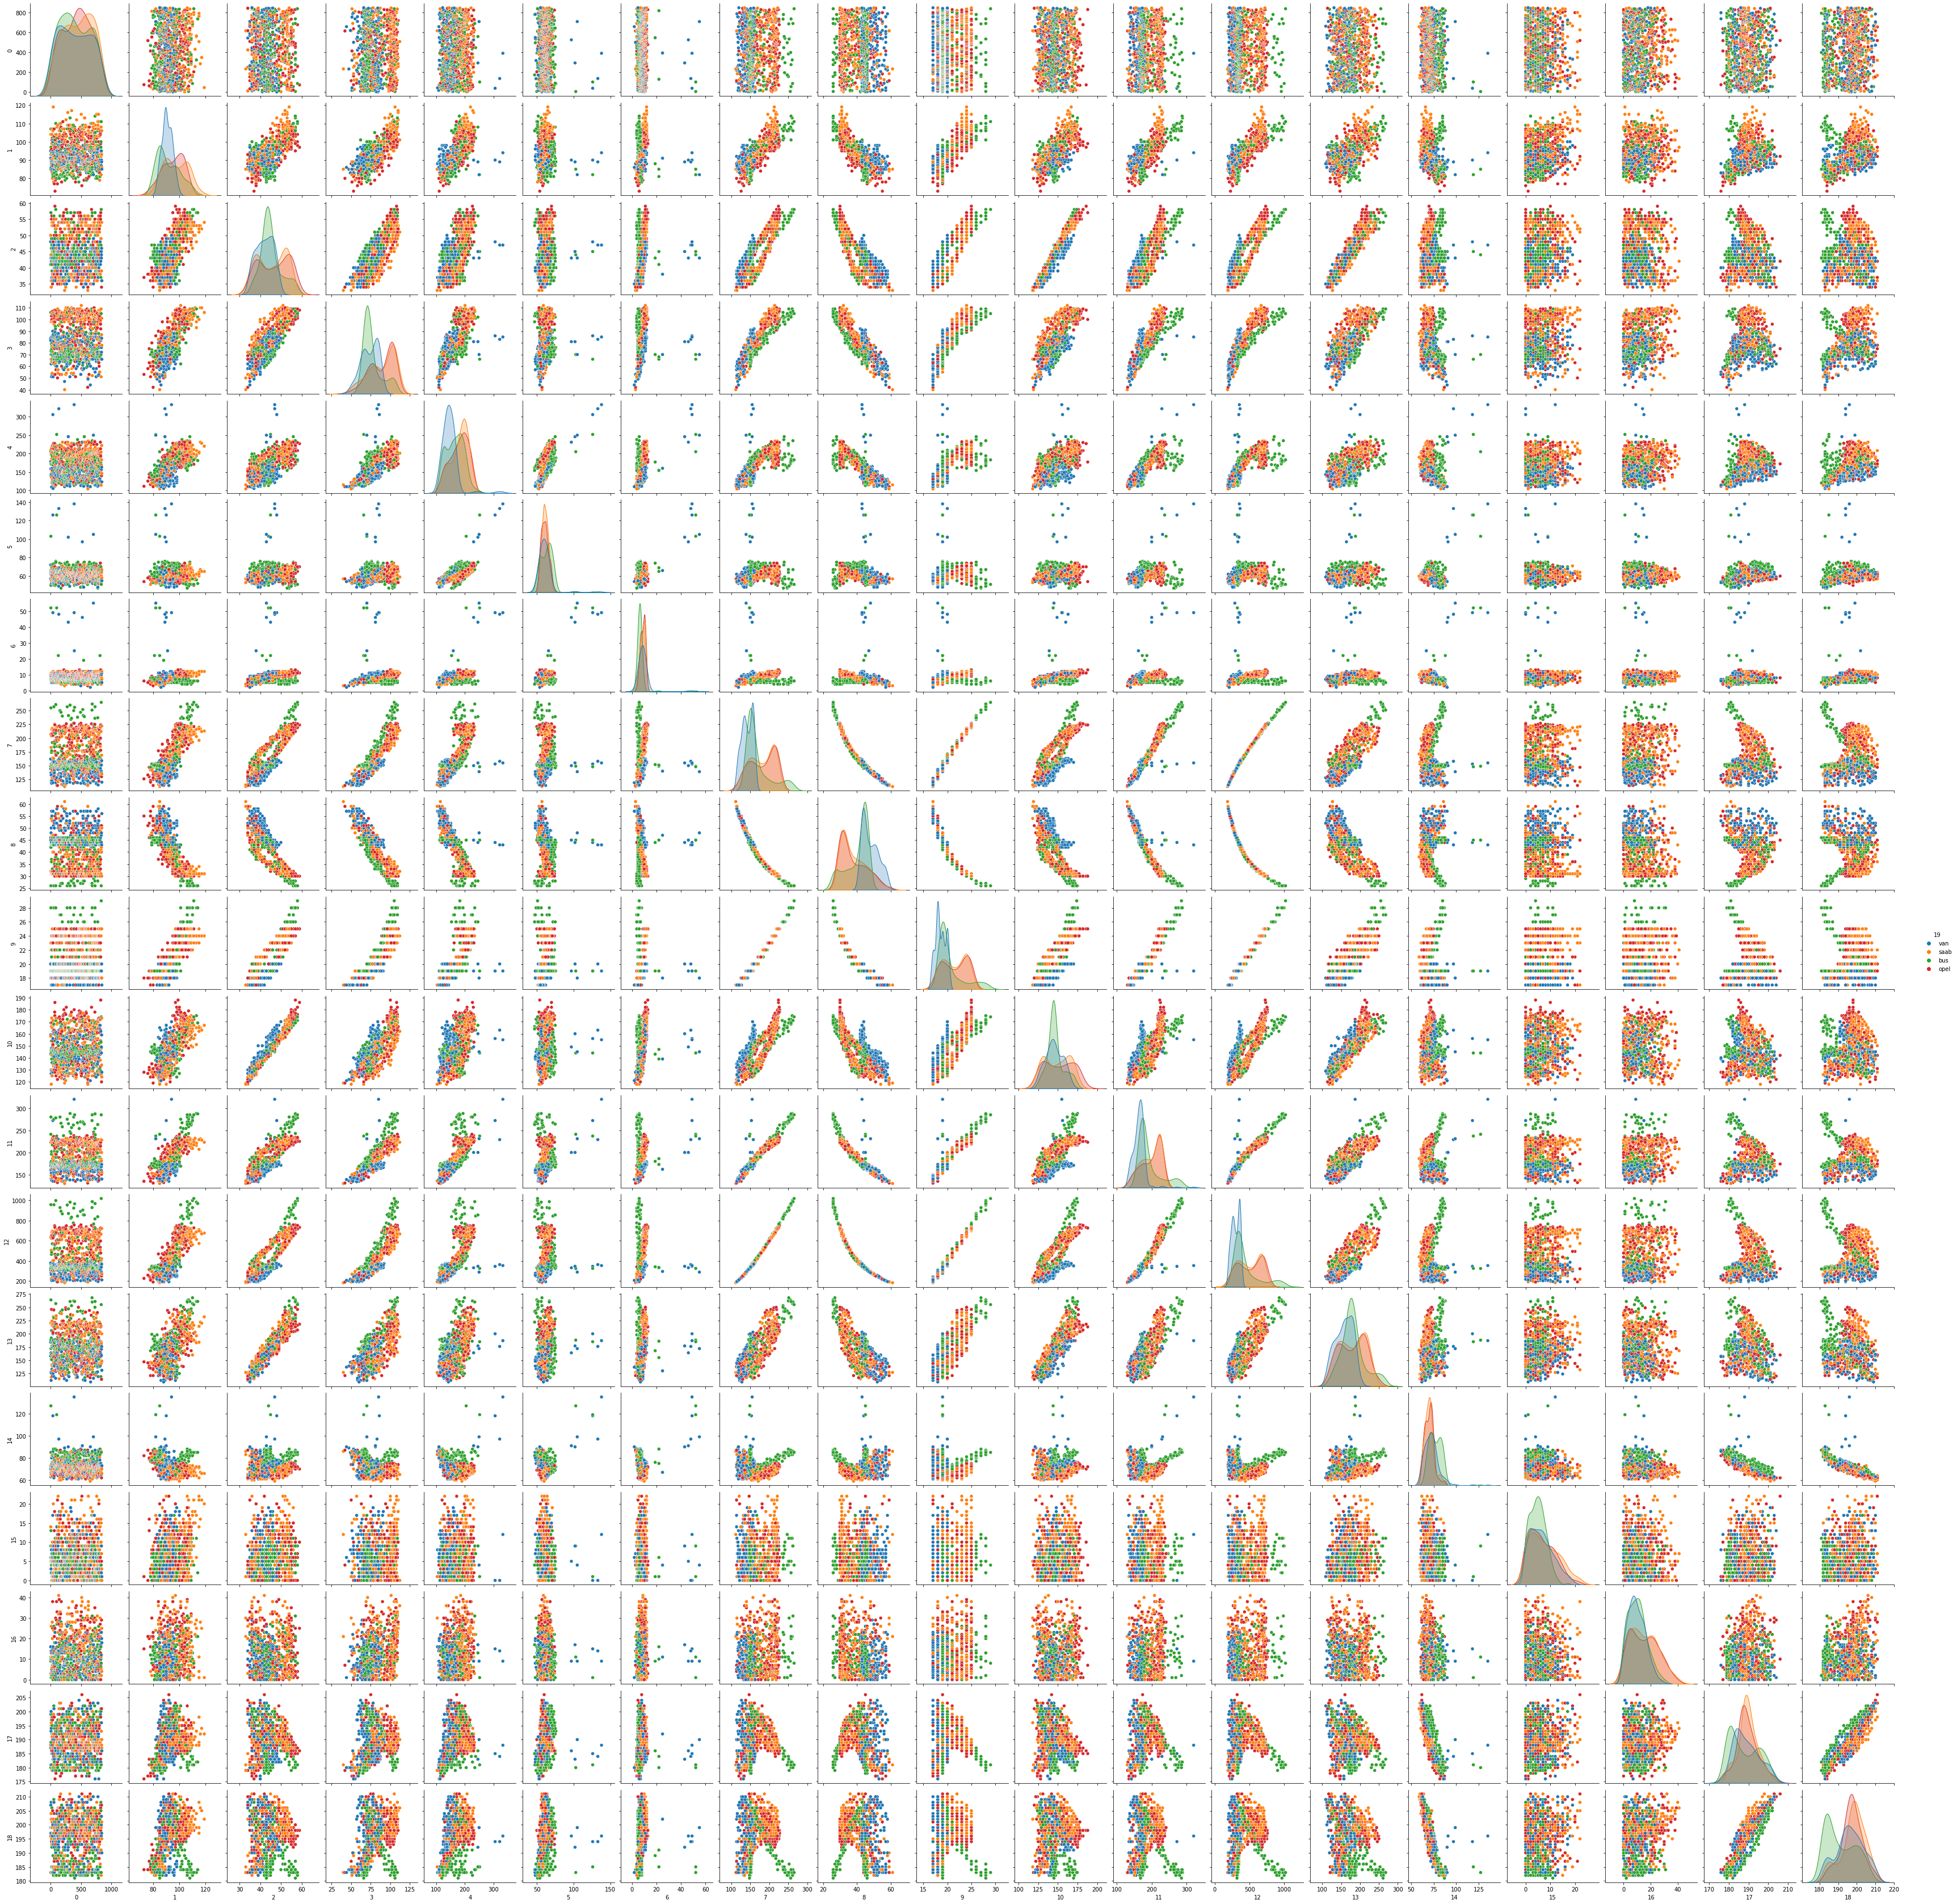

In [ ]:
plt.figure(figsize=(15, 30))
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None)
sns.pairplot(dataset, hue=19)

Графиков оказалось слишком много, однако некоторые были даже полезными, можно даже визуально отедлить их линейным сопособом, однако есть подорение, что не все 19 признаков нужны.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
from scikitplot.metrics import plot_roc

estimator = LogisticRegression(solver='saga', multi_class='multinomial', max_iter= 1000, tol=1e-3, random_state=42)
estimator.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
param_grid = {'C': [0.1, 1, 2, 5, 10, 15, 20, 50], 'penalty': ['l1', 'l2']}
cv = 3
optimizer = GridSearchCV(estimator, param_grid, cv=cv)

In [ ]:
%%time
optimizer.fit(X_train_scaled, y_train)
print(optimizer.best_params_)

{'C': 20, 'penalty': 'l2'}
Wall time: 5.93 s


In [ ]:
print(optimizer.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


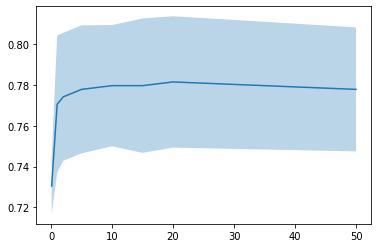

In [ ]:
def plot_scores(optimizer):   
    c = np.array(optimizer.cv_results_['param_C'][1::2],dtype=float)
    stds = np.array(optimizer.cv_results_['std_test_score'][1::2],dtype=float)
    means = np.array(optimizer.cv_results_['mean_test_score'][1::2],dtype=float)
    plt.fill_between(c, means-stds, means+stds, alpha=0.3)
    plt.plot(c, means)
    plt.show()
    
plot_scores(optimizer)

Явной тенденции нет, около 20 C оптимален.

In [ ]:
optimal_logreg_estimator = LogisticRegression(penalty=optimizer.best_params_['penalty'], 
                                              C=optimizer.best_params_['C'], solver='saga', 
                                              multi_class='multinomial', max_iter= 1000, 
                                              tol=1e-3, random_state=42)
optimal_logreg_estimator.fit(X_train_scaled, y_train)

y_pred = optimal_logreg_estimator.predict(X_test_scaled)
# micro - accuracy, macro - mean by each label
print('Accuracy: {}, f1 score: {}'.format(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')))

Accuracy: 0.8148148148148148, f1 score: 0.8097594857867831


Это отличная точность на мой взгляд для станартного алгоритма с 4 метками.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.94      0.92      0.93        86
        opel       0.61      0.68      0.65        60
        saab       0.74      0.68      0.71        84
         van       0.94      0.97      0.96        67

    accuracy                           0.81       297
   macro avg       0.81      0.81      0.81       297
weighted avg       0.82      0.81      0.82       297



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

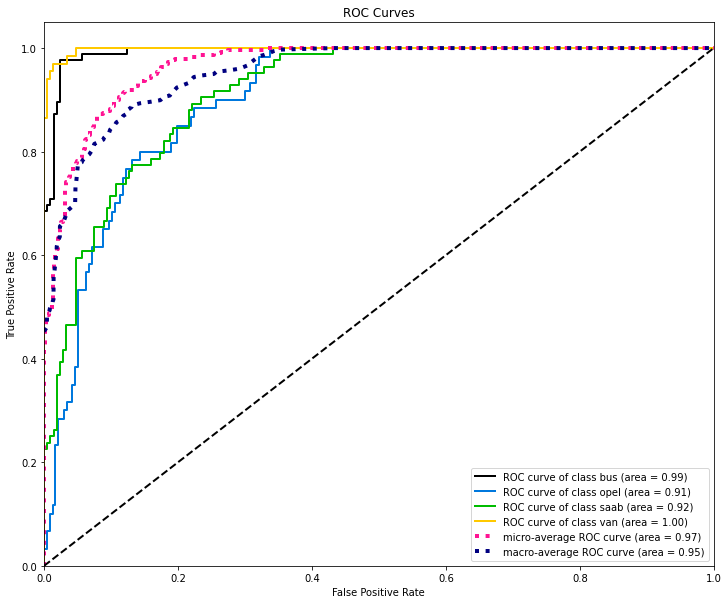

In [ ]:
y_pred = optimal_logreg_estimator.predict_proba(X_test_scaled)
plot_roc(y_test, y_pred, figsize = (12, 10))

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

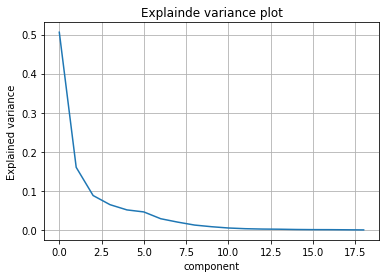

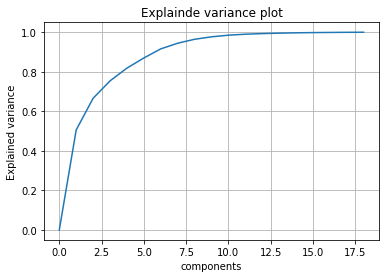

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
X_train_pca = pca.fit(X_train_scaled)
exp_var_pca = pca.explained_variance_ratio_
plt.plot(exp_var_pca)
plt.title('Explainde variance plot')
plt.xlabel('component')
plt.ylabel('Explained variance')
plt.grid(':')
plt.show()

plt.plot([np.sum(exp_var_pca[:i]) for i in range(len(exp_var_pca))])
plt.title('Explainde variance plot')
plt.xlabel('components')
plt.ylabel('Explained variance')
plt.grid(':')
plt.show()

Видно, что первые 10 компонент почти полностью "характеризуют" выборку. То есть если в 18 мерном пространстве признаков отрисовать наши точки, получится, что они лежит в какой-то гиперплоскости, задаваемой 10 признаками признаками, их и будем использовать(они уже отсортированы в порядке значимости, на первом графике это видно).

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
N_COMP = 10
pca = PCA(n_components=N_COMP, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Как справедливо было замечено в чате, если обучаться на pca-preprocessed data то будет утечка данных, следовательно, используем pipe;ine.

In [ ]:
from sklearn.pipeline import Pipeline
pipeline_pca = Pipeline(steps=
                        (('Scaling', StandardScaler()),
                        ('PCA', PCA(n_components=N_COMP, random_state=42)),
                        ('Estimator', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, 
                                                        max_iter=500, random_state=42)
                        )))
param_grid = {
    'Estimator__C': [0.1, 1, 2, 5, 10, 15, 20, 50], 'Estimator__penalty': ['l1', 'l2']
}

optimizer = GridSearchCV(pipeline_pca, param_grid, cv=cv)

In [ ]:
%%time
optimizer.fit(X_train, y_train)
print(optimizer.best_params_)

{'Estimator__C': 2, 'Estimator__penalty': 'l2'}
Wall time: 2.18 s


In [ ]:
y_pred = optimizer.predict(X_test)
# micro - accuracy, macro - mean by each label
print('Accuracy: {}, f1 score: {}'.format(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')))

Accuracy: 0.696969696969697, f1 score: 0.6865637931114061


Точность упала на 10%, этого следовало ожидать, все-таки сократили количество признаков в 2 раза, зато стало работать быстрее.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.83      0.92      0.87        86
        opel       0.42      0.60      0.50        60
        saab       0.59      0.36      0.44        84
         van       0.94      0.93      0.93        67

    accuracy                           0.70       297
   macro avg       0.70      0.70      0.69       297
weighted avg       0.70      0.70      0.69       297



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

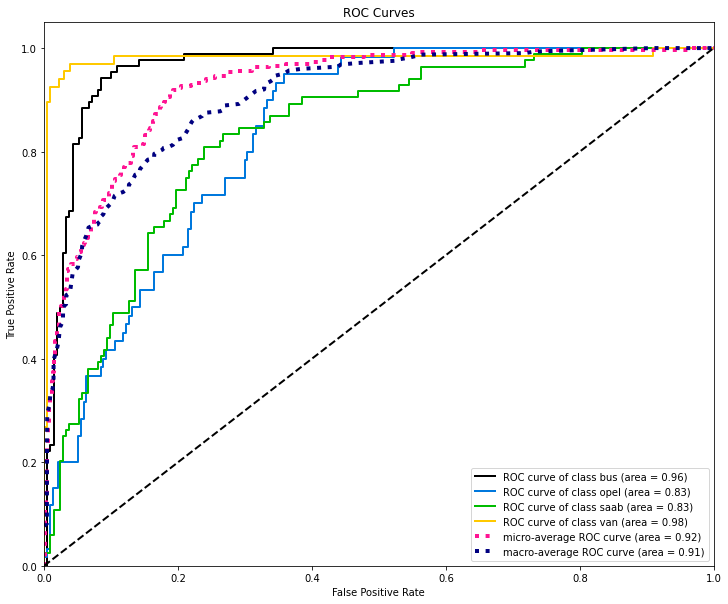

In [ ]:
y_pred = optimizer.predict_proba(X_test)
plot_roc(y_test, y_pred, figsize = (12, 10))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': np.arange(1, 25)}
estimator = DecisionTreeClassifier(random_state=42)
optimizer = GridSearchCV(estimator, param_grid, cv=cv)

In [ ]:
%%time
optimizer.fit(X_train_scaled, y_train)
print(optimizer.best_params_)

{'max_depth': 4}
Wall time: 372 ms


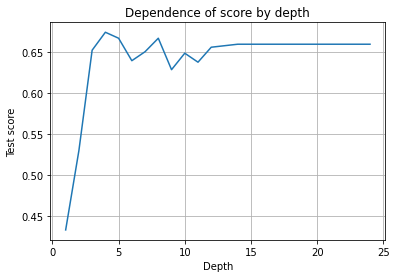

In [ ]:
plt.plot(np.arange(1, 25), optimizer.cv_results_['mean_test_score'])
plt.title('Dependence of score by depth')
plt.xlabel("Depth")
plt.ylabel('Test score')
plt.grid()

Хорошо видно, что при глубине дерева в районе 4 график выходит на асимптоту, дальнейшие колебания незначительны.

In [ ]:
optimal_dectree_estimator = DecisionTreeClassifier(max_depth=optimizer.best_params_['max_depth'], random_state=42)

optimal_dectree_estimator.fit(X_train_scaled, y_train)

y_pred = optimal_dectree_estimator.predict(X_test_scaled)
# micro - accuracy, macro - mean by each label
print('Accuracy: {}, f1 score: {}'.format(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')))

Accuracy: 0.6262626262626263, f1 score: 0.5844549429108252


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.79      0.83      0.81        86
        opel       0.48      0.20      0.28        60
        saab       0.52      0.63      0.57        84
         van       0.62      0.75      0.68        67

    accuracy                           0.63       297
   macro avg       0.60      0.60      0.58       297
weighted avg       0.61      0.63      0.61       297



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

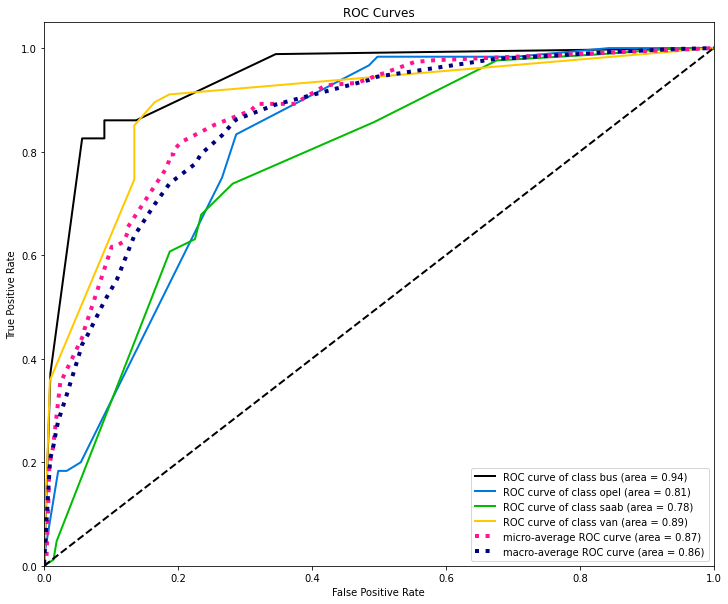

In [ ]:
y_pred = optimal_dectree_estimator.predict_proba(X_test_scaled)
plot_roc(y_test, y_pred, figsize = (12, 10))

Стоит заметить, что на этом графике гораздо меньше trash holds, качество на 10% хуже, чем на log reg'е.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import resample

N_min = 2
N_max = 100
step = 5
Ns = np.arange(N_min, N_max, step)

In [ ]:
#bootstrap
train = np.hstack((X_train_scaled, y_train[:, np.newaxis]))

all_train = []
for _ in range(N_max):
    all_train.append(resample(train))

In [ ]:
%%time
logreg_pred = []
dectree_pred = []

# training on each sample
for cur_train in all_train:
    optimal_logreg_estimator.fit(cur_train[:, :-1], cur_train[:, -1])
    optimal_dectree_estimator.fit(cur_train[:, :-1], cur_train[:, -1])
    
    logreg_pred.append([optimal_logreg_estimator.predict(X_test_scaled)])
    dectree_pred.append([optimal_dectree_estimator.predict(X_test_scaled)])

logreg_pred = np.asarray(logreg_pred)
dectree_pred = np.asarray(dectree_pred)

Wall time: 15.5 s


In [ ]:
# to find the average prediction use sps.mode
import scipy.stats as sps

av_logreg_pred = []
av_dectree_pred = []

for N in Ns:
    av_logreg_pred.append(sps.mode(logreg_pred[:N], axis=0)[0])
    av_dectree_pred.append(sps.mode(dectree_pred[:N], axis=0)[0])

In [ ]:
logreg_accuracy_scores = []
dectree_accuracy_scores = []
logreg_f1_scores = []
dectree_f1_scores = []

for i in range(len(Ns)):
    logreg_accuracy_scores.append(accuracy_score(np.ravel(av_logreg_pred[i]), y_test))
    dectree_accuracy_scores.append(accuracy_score(np.ravel(av_dectree_pred[i]), y_test))
    
    logreg_f1_scores.append(f1_score(np.ravel(av_logreg_pred[i]), y_test, average='macro'))
    dectree_f1_scores.append(f1_score(np.ravel(av_dectree_pred[i]), y_test, average='macro'))

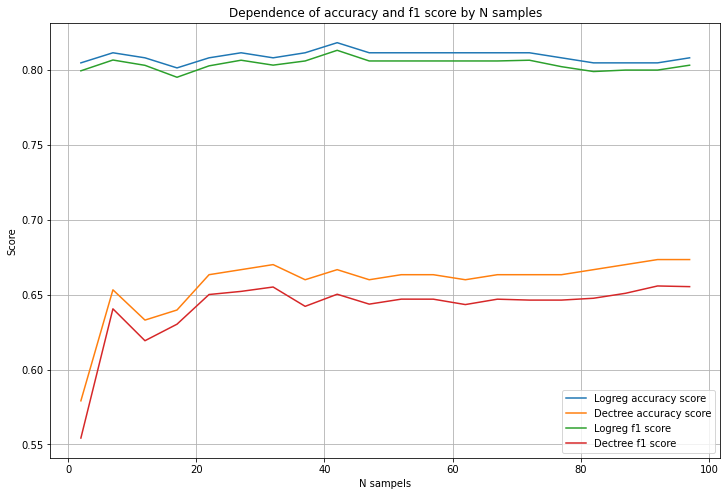

In [ ]:
# plotting scores
plt.figure(figsize=(12, 8))
plt.plot(Ns, logreg_accuracy_scores, label='Logreg accuracy score')
plt.plot(Ns, dectree_accuracy_scores, label='Dectree accuracy score')
plt.plot(Ns, logreg_f1_scores, label='Logreg f1 score')
plt.plot(Ns, dectree_f1_scores, label='Dectree f1 score')

plt.title('Dependence of accuracy and f1 score by N samples')
plt.xlabel("N sampels")
plt.ylabel('Score')
plt.legend()
plt.grid(':')
plt.show()

In [ ]:
logreg_bagging_best_estimator = BaggingClassifier(base_estimator = optimal_logreg_estimator, n_estimators = 40, random_state=42)
dectree_bagging_best_estimator = BaggingClassifier(base_estimator = optimal_dectree_estimator, n_estimators = 100, random_state=42)

Хорошо видно, что f1 score и accuracy у log reg'ии почти не отличимы f1 score и accuracy, держатся на уровне 80%, а у decision tree увеличивается. Деревья хороши в ансамблях, они легко переобучаются и они сами сильно зависят от выборки, поэтому чем больше деревьев построено на бутстрапированных выборках(а затем их результаты усредняются), тем лучше они улавливают общие закономерности данных, а не частные случаи. Дело в том, что у деревьев малое смещение и большой разброс, так что для них можно брать все 100 resampl'ов, а для log reg это не так актуально, можно взять в районе 40.

Насчет оптимальных гиперпараметров, кажется, что они достаточно сильно зависят от выборки, так как пока я не добавил random_state в train_test_split получались абсолютно разные по порядку C, так что скорее всего параметры не являются оптимальными для каждого resample. 

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators' : np.arange(2, 100, 5)}

estimator = RandomForestClassifier(random_state=42)

In [ ]:
%%time
optimizer = GridSearchCV(estimator, param_grid, cv=cv)
optimizer.fit(X_train_scaled, y_train)
print(optimizer.best_params_)

{'n_estimators': 67}
Wall time: 13.8 s


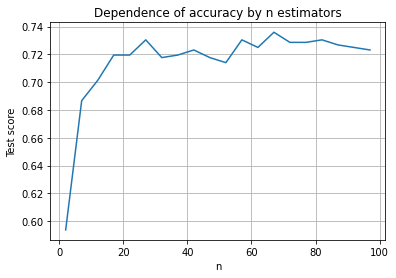

In [ ]:
plt.plot(np.arange(2, 100, 5), optimizer.cv_results_['mean_test_score'])
plt.title('Dependence of accuracy by n estimators')
plt.xlabel("n")
plt.ylabel('Test score')
plt.grid()

По графику видно, что оптимальное число деревье около 20 - 30, дальше график выходит на асимптоту и происходят небольшие колебания. Однако самый лучший результат достигается при 70. 

In [ ]:
N_EST = 25

In [ ]:
randomforest_best_estimator = RandomForestClassifier(n_estimators = N_EST, random_state=42)

randomforest_best_estimator.fit(X_train_scaled, y_train)
y_pred = randomforest_best_estimator.predict(X_test_scaled)
# micro - accuracy, macro - mean by each label
print('Accuracy: {}, f1 score: {}'.format(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')))

Accuracy: 0.7508417508417509, f1 score: 0.7426291423001948


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.95      0.94      0.95        86
        opel       0.47      0.53      0.50        60
        saab       0.61      0.55      0.57        84
         van       0.94      0.96      0.95        67

    accuracy                           0.75       297
   macro avg       0.74      0.74      0.74       297
weighted avg       0.75      0.75      0.75       297



На самом деле, это отличный результат, увеличили финальную точность примерно на 5 процентов, по сравнению с использованием просто деревьев.

То же самое для f1 score

In [ ]:
%%time
optimizer = GridSearchCV(estimator, param_grid, cv=cv, scoring = 'f1_macro')
optimizer.fit(X_train_scaled, y_train)
print(optimizer.best_params_)

{'n_estimators': 67}
Wall time: 13.9 s


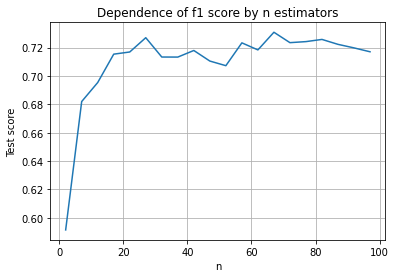

In [ ]:
plt.plot(np.arange(2, 100, 5), optimizer.cv_results_['mean_test_score'])
plt.title('Dependence of f1 score by n estimators')
plt.xlabel("n")
plt.ylabel('Test score')
plt.grid()

Ситуация аналогична, в районе 25 деревьев score выходит на асимптоту, дальнейшие колебания не значительны.

In [ ]:
randomforest_best_estimator = RandomForestClassifier(n_estimators = N_EST, random_state=42)

randomforest_best_estimator.fit(X_train_scaled, y_train)
y_pred = randomforest_best_estimator.predict(X_test_scaled)
# micro - accuracy, macro - mean by each label
print('Accuracy: {}, f1 score: {}'.format(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')))

Accuracy: 0.7508417508417509, f1 score: 0.7426291423001948


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.95      0.94      0.95        86
        opel       0.47      0.53      0.50        60
        saab       0.61      0.55      0.57        84
         van       0.94      0.96      0.95        67

    accuracy                           0.75       297
   macro avg       0.74      0.74      0.74       297
weighted avg       0.75      0.75      0.75       297



Я бы сказал, что оптимальное число деревьев в random forest похоже на то, что было получено при bagging. Тенеденция к росту точности при увеличении числа деревьев(и дальнейшему выходу на асимптоту) остается. Однако стоит учесть, что в random forest по хорошему еще должен быть рандомизирован процесс построения каждого дерева, то есть на этапе выбора оптимального признака, по которому будет происходить разбиение, он ищется не среди всего множества признаков, а среди случайного
подмножества. Это увеличивает независимость алгоритмов, а значит accuracy должно расти быстрее. 

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
from sklearn.model_selection import StratifiedKFold

N = 10

def score_by_train_size(Xtrain, ytrain, Xtest, ytest, estimator, estimator_name):
    accuracy = []
    f1score = []
    
    all_train_ind = []
    
    skf = StratifiedKFold(n_splits=N, shuffle=True, random_state = 42)
    
    for train_index, test_index in skf.split(Xtrain, ytrain):
        all_train_ind.extend(test_index)
        estimator.fit(Xtrain[all_train_ind], ytrain[all_train_ind])
        ypred = estimator.predict(Xtest)
        accuracy.append(accuracy_score(ytest, ypred))
        f1score.append(f1_score(ytest, ypred,average='macro'))

    plt.plot(np.arange(1, 11) * len(Xtrain) / 10, accuracy, label='acc. {}'.format(estimator_name))
    plt.plot(np.arange(1, 11) * len(Xtrain) / 10, f1score, label='f1 {}'.format(estimator_name))
    plt.title('Dependence of accuracy and f1 score by train size for {}'.format(estimator_name))
    plt.xlabel("size")
    plt.ylabel('Score')
    plt.legend()
    plt.grid(':')
    plt.show()

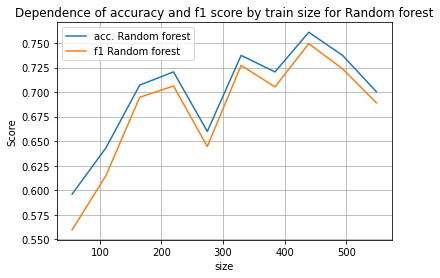

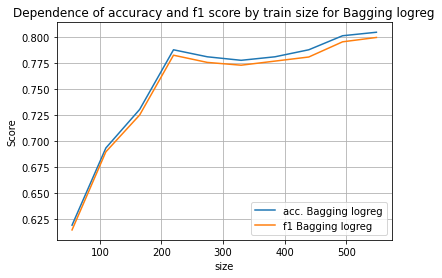

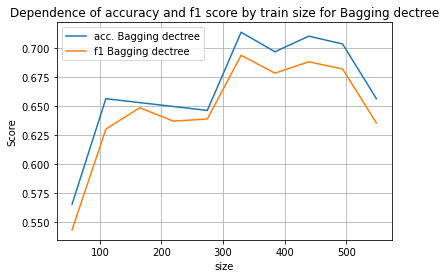

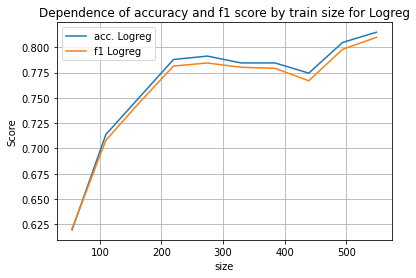

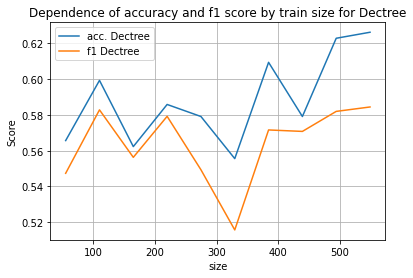

Wall time: 1min 30s


In [ ]:
%%time
score_by_train_size(X_train_scaled, y_train, X_test_scaled, y_test, randomforest_best_estimator, 'Random forest')
score_by_train_size(X_train_scaled, y_train, X_test_scaled, y_test, logreg_bagging_best_estimator, 'Bagging logreg')
score_by_train_size(X_train_scaled, y_train, X_test_scaled, y_test, dectree_bagging_best_estimator, 'Bagging dectree')
score_by_train_size(X_train_scaled, y_train, X_test_scaled, y_test, optimal_logreg_estimator, 'Logreg')
score_by_train_size(X_train_scaled, y_train, X_test_scaled, y_test, optimal_dectree_estimator, 'Dectree')

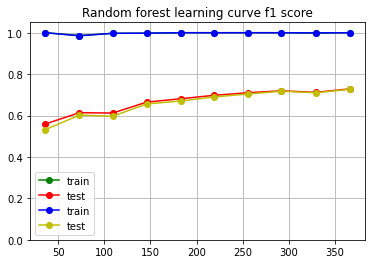

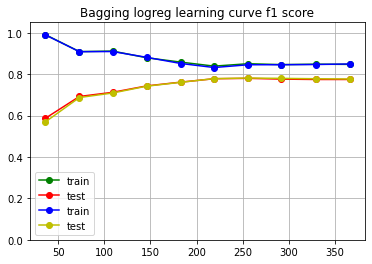

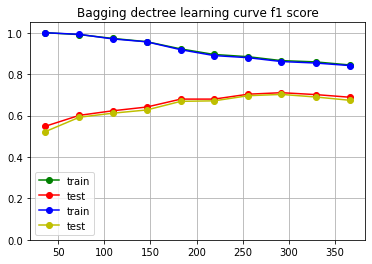

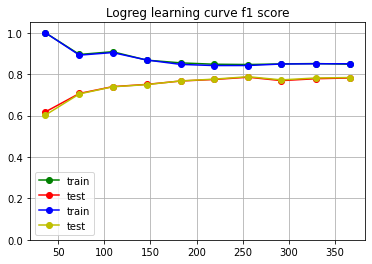

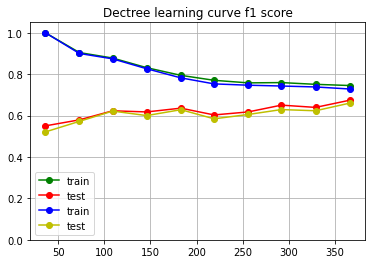

Wall time: 5min 20s


In [ ]:
%%time
# test of built in function
from sklearn.model_selection import learning_curve

def builtin(Xtrain, ytrain, estimator, estimator_name):
    train_sizes, train_scores, test_scores = learning_curve(estimator, Xtrain, ytrain, 
                                                                       train_sizes=np.arange(0.1, 1.1, 0.1), 
                                                                       cv=3, scoring='accuracy', random_state=42)
    plt.title('{} learning curve accuracy'.format(estimator_name))
    plt.grid()
    plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
    plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, Xtrain, ytrain, 
                                                                       train_sizes=np.arange(0.1, 1.1, 0.1), 
                                                                       cv=3, scoring='f1_macro', random_state=42)
    plt.title('{} learning curve f1 score'.format(estimator_name))
    plt.grid()
    plt.plot(train_sizes, train_scores.mean(axis = 1), 'b-', marker='o', label='train')
    plt.plot(train_sizes, test_scores.mean(axis = 1), 'y-', marker='o', label='test')
    
    plt.ylim((0.0, 1.05))
    plt.legend()
    plt.grid(':')
    plt.show()

builtin(X_train_scaled, y_train, randomforest_best_estimator, 'Random forest')
builtin(X_train_scaled, y_train, logreg_bagging_best_estimator, 'Bagging logreg')
builtin(X_train_scaled, y_train, dectree_bagging_best_estimator, 'Bagging dectree')
builtin(X_train_scaled, y_train, optimal_logreg_estimator, 'Logreg')
builtin(X_train_scaled, y_train, optimal_dectree_estimator, 'Dectree')

**Выводы**:


Были построены графики двумя методами, с помощью learning curve(передавалсь только тренировочная выборка) и честным методом, где тестрование было на тестовой выборке. В обоих методах у каждой модели наблюдается тенденция к увеличению точности и f1 score при увеличении train size. Однако видно, что вне зависимости от размера выборки, decision tree без композиции и улучшений дсотаточно слабый агоритм, скорее всего из-за переобучения. Как и было отмечено в пунктах выше log reg и bagging log reg не сильно отличаются, разброс у log reg мал. Bagging, применненый к dec tree дает прирост в точности почти в 10%, random forest еще +5%. И еще видно, что accuracy у decision tree гораздо менее плавный, чем в остальных случаях, это тоже связано с переобучением, у log reg и random forest таких пробем нет.